# DAPT 2020 Dataset Analysis

* **Author:** Patrik Goldschmidt (igoldschmidt@fit.vut.cz)
* **Project:** Network Intrusion Datasets: A Survey, Limitations, and Recommendations
* **Date:** 2024

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

We will select a sample file due to the sheer amount of the data.

In [13]:
DATA_PATH_CSVS = '/data/dapt2020/csv/'

# Sample CSV file from public network for analysis - pick one where the attacks should be located
SAMPLE_PUB_CSV_PATH = DATA_PATH_CSVS + 'enp0s3-public-tuesday.pcap_Flow.csv'

# Sample CSV from the same day from the private network
SAMPLE_PRIV_CSV_PATH = DATA_PATH_CSVS + 'enp0s3-pvt-tuesday.pcap_Flow.csv'

In [8]:
sample = pd.read_csv(SAMPLE_PUB_CSV_PATH)


In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29242 entries, 0 to 29241
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     29242 non-null  object 
 1   Src IP                      29242 non-null  object 
 2   Src Port                    29242 non-null  int64  
 3   Dst IP                      29242 non-null  object 
 4   Dst Port                    29242 non-null  int64  
 5   Protocol                    29242 non-null  int64  
 6   Timestamp                   29242 non-null  object 
 7   Flow Duration               29242 non-null  int64  
 8   Total Fwd Packet            29242 non-null  int64  
 9   Total Bwd packets           29242 non-null  int64  
 10  Total Length of Fwd Packet  29242 non-null  float64
 11  Total Length of Bwd Packet  29242 non-null  float64
 12  Fwd Packet Length Max       29242 non-null  float64
 13  Fwd Packet Length Min       292

In [10]:
sample.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,16/07/2019 11:59:02 AM,116171923,86,1,...,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,BENIGN
1,192.168.3.10-239.2.11.71-53569-8662-17,192.168.3.10,53569,239.2.11.71,8662,17,16/07/2019 11:59:09 AM,119738502,31,1,...,3244690.75,2.304140e+06,5448741.0,64.0,1.525138e+07,5.298373e+06,20016015.0,7732663.0,BENIGN,BENIGN
2,192.168.3.29-35.164.43.181-44100-443-6,192.168.3.29,44100,35.164.43.181,443,6,16/07/2019 11:59:47 AM,79615889,8,6,...,84656.50,7.983236e+02,85221.0,84092.0,3.890854e+07,5.918482e+06,43093543.0,34723545.0,BENIGN,BENIGN
3,192.168.3.29-35.222.85.5-40260-80-6,192.168.3.29,40260,35.222.85.5,80,6,16/07/2019 12:02:19 PM,103545,3,5,...,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,BENIGN
4,192.168.3.29-23.219.38.65-46040-80-6,192.168.3.29,46040,23.219.38.65,80,6,16/07/2019 12:00:21 PM,110640799,21,18,...,865855.20,1.801662e+06,4736597.0,15742.0,1.019663e+07,6.411008e+04,10236479.0,10046091.0,BENIGN,BENIGN


In [11]:
sample['Activity'].value_counts()

Activity
BENIGN                    16842
Network Scan               7614
Web Vulnerability Scan     2574
Directory Bruteforce       1503
Normal                      535
Account Discovery           124
Account Bruteforce           50
Name: count, dtype: int64

In [12]:
sample['Stage'].value_counts()

Stage
BENIGN            16842
Reconnaissance    11865
Benign              535
Name: count, dtype: int64

In [19]:
# Do the stage and activity match - sanity check?
len(sample[sample['Stage'] == 'Reconnaissance'])

11865

In [22]:
len(sample[(sample['Activity'] != 'Normal') & (sample['Activity'] != 'BENIGN')])

11865

All good.

In [14]:
# Lets see internal network sample CSV
sample_priv = pd.read_csv(SAMPLE_PRIV_CSV_PATH)

In [15]:
sample_priv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     2615 non-null   object 
 1   Src IP                      2615 non-null   object 
 2   Src Port                    2615 non-null   int64  
 3   Dst IP                      2615 non-null   object 
 4   Dst Port                    2615 non-null   int64  
 5   Protocol                    2615 non-null   int64  
 6   Timestamp                   2615 non-null   object 
 7   Flow Duration               2615 non-null   int64  
 8   Total Fwd Packet            2615 non-null   int64  
 9   Total Bwd packets           2615 non-null   int64  
 10  Total Length of Fwd Packet  2615 non-null   float64
 11  Total Length of Bwd Packet  2615 non-null   float64
 12  Fwd Packet Length Max       2615 non-null   float64
 13  Fwd Packet Length Min       2615 

In [16]:
sample_priv['Activity'].value_counts()

Activity
Normal    2615
Name: count, dtype: int64

In [17]:
sample_priv['Stage'].value_counts()

Stage
Benign    2615
Name: count, dtype: int64

In [30]:
# Ok, load all CSVs into a single variable
data_all = pd.DataFrame()

for file in os.listdir(DATA_PATH_CSVS):
    if file.endswith('.csv'):
        # Load the file and merge with existing DataFrame
        data_part = pd.read_csv(os.path.join(DATA_PATH_CSVS, file))

        data_all = pd.concat([data_all, data_part])

enp0s3-monday.pcap_Flow.csv
enp0s3-public-thursday.pcap_Flow.csv
enp0s3-public-tuesday.pcap_Flow.csv
enp0s3-tcpdump-pvt-friday.pcap_Flow.csv
enp0s3-tcpdump-friday.pcap_Flow.csv
enp0s3-pvt-thursday.pcap_Flow.csv
enp0s3-monday-pvt.pcap_Flow.csv
enp0s3-public-wednesday.pcap_Flow.csv
enp0s3-pvt-wednesday.pcap_Flow.csv
enp0s3-pvt-tuesday.pcap_Flow.csv


In [29]:
data_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 86690 entries, 0 to 2614
Data columns (total 170 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    Flow ID                     object 
 1    Src IP                      object 
 2    Src Port                    float64
 3    Dst IP                      object 
 4    Dst Port                    float64
 5    Protocol                    float64
 6    Timestamp                   object 
 7    Flow Duration               float64
 8    Total Fwd Packet            float64
 9    Total Bwd packets           float64
 10   Total Length of Fwd Packet  float64
 11   Total Length of Bwd Packet  float64
 12   Fwd Packet Length Max       float64
 13   Fwd Packet Length Min       float64
 14   Fwd Packet Length Mean      float64
 15   Fwd Packet Length Std       float64
 16   Bwd Packet Length Max       float64
 17   Bwd Packet Length Min       float64
 18   Bwd Packet Length Mean      float64
 19   Bwd Pack

It was found by manual analysis that the thursday private file does not have a header. Therefore, we append the header manually and rerun the loading process.

In [49]:
THURSDAY_PATH = DATA_PATH_CSVS + 'enp0s3-pvt-thursday.pcap_Flow.csv'
HEADER = ""

In [63]:
with open(SAMPLE_PRIV_CSV_PATH) as f:
    HEADER = f.readline()

HEADER

'Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,F

In [69]:
# Copy a an old file as a backup and give it csv2 extension so it would not be included in the next loop
shutil.copyfile(THURSDAY_PATH, f'{THURSDAY_PATH}2')


'/data/dapt2020/csv/enp0s3-pvt-thursday.pcap_Flow.csv2'

In [80]:
# Copy an old file contents
with open(f'{THURSDAY_PATH}2', 'r') as f:
    contents_old = f.read()

In [90]:
# Append the header to the original CSV file
with open(THURSDAY_PATH, 'w', encoding='UTF-8') as f:
    f.write(f'{HEADER}{contents_old}')

In [91]:
!head $THURSDAY_PATH

Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fw

# The Entire Dataset

In [92]:
# Let's go once again
data_all = pd.DataFrame()

for file in os.listdir(DATA_PATH_CSVS):
    if file.endswith('.csv'):
        # Load the file and merge with existing DataFrame
        data_part = pd.read_csv(os.path.join(DATA_PATH_CSVS, file))

        data_all = pd.concat([data_all, data_part])

In [93]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86691 entries, 0 to 2614
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     86691 non-null  object 
 1   Src IP                      86691 non-null  object 
 2   Src Port                    86691 non-null  int64  
 3   Dst IP                      86691 non-null  object 
 4   Dst Port                    86691 non-null  int64  
 5   Protocol                    86691 non-null  int64  
 6   Timestamp                   86691 non-null  object 
 7   Flow Duration               86691 non-null  int64  
 8   Total Fwd Packet            86691 non-null  int64  
 9   Total Bwd packets           86691 non-null  int64  
 10  Total Length of Fwd Packet  86691 non-null  float64
 11  Total Length of Bwd Packet  86691 non-null  float64
 12  Fwd Packet Length Max       86691 non-null  float64
 13  Fwd Packet Length Min       86691 non

In [94]:
data_all['Activity'].value_counts()

Activity
Normal                    44258
BENIGN                    19454
Directory Bruteforce       9970
Network Scan               7742
Web Vulnerability Scan     2574
Account Discovery          2408
Account Bruteforce          141
SQL Injection                84
Backdoor                     20
Privilege Escalation         13
Command Injection            12
CSRF                          7
Data Exfiltration             6
Malware Download              2
Name: count, dtype: int64

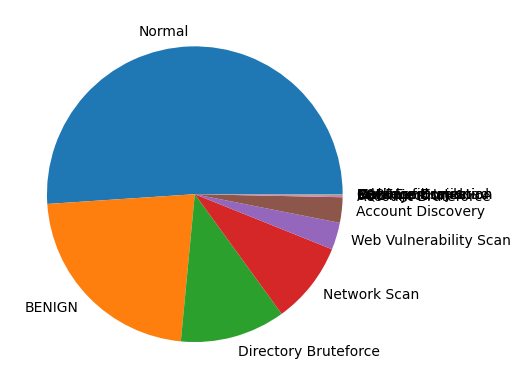

In [111]:
data_all['Activity'].value_counts().plot.pie()

In [95]:
data_all['Stage'].value_counts()

Stage
Benign                44258
BENIGN                19454
Reconnaissance        11909
Establish Foothold     8604
Lateral Movement       2451
Data Exfiltration        15
Name: count, dtype: int64

In [124]:
src_ips = data_all['Src IP'].value_counts()

# Lets filter out only IPs with 100 or more flows over 5 days
src_ips[src_ips > 20]

Src IP
192.168.3.29       39805
206.207.50.50      18327
184.98.36.245       5268
192.168.3.30        3132
192.168.3.10        2693
                   ...  
172.217.11.67         23
172.217.5.66          23
52.42.232.148         23
173.194.162.171       23
172.217.14.102        22
Name: count, Length: 63, dtype: int64

In [131]:
# 77,139,733 packets were counted from PCAP analysis - flows are disproportionate. Verify if the counts match
data_all['Total Fwd Packet'].sum() + data_all['Total Bwd packets'].sum()

100239471

100,239,471 from flows vs. 77,139,733 based on packets... some PCAP data are apparently missing.

In [112]:
# Let's verify the time -- e.g., Monday
FILE_PATH_MONDAY = DATA_PATH_CSVS + 'enp0s3-monday.pcap_Flow.csv'

In [113]:
mon_data = pd.read_csv(FILE_PATH_MONDAY)

In [116]:
mon_data['Timestamp'].sort_values()

0       15/07/2019 01:45:37 PM
2       15/07/2019 01:45:38 PM
3       15/07/2019 01:45:38 PM
3310    15/07/2019 01:45:38 PM
141     15/07/2019 01:45:39 PM
                 ...          
4929    15/07/2019 09:29:56 PM
5931    15/07/2019 09:29:56 PM
6926    15/07/2019 09:29:56 PM
3584    15/07/2019 09:30:09 PM
7550    15/07/2019 09:30:10 PM
Name: Timestamp, Length: 8728, dtype: object

In [117]:
sample['Timestamp'].sort_values()

198      16/07/2019 01:00:43 PM
205      16/07/2019 01:00:58 PM
202      16/07/2019 01:01:10 PM
19998    16/07/2019 01:01:17 PM
203      16/07/2019 01:01:20 PM
                  ...          
25113    16/07/2019 12:59:21 PM
26105    16/07/2019 12:59:21 PM
12083    16/07/2019 12:59:21 PM
206      16/07/2019 12:59:22 PM
200      16/07/2019 12:59:38 PM
Name: Timestamp, Length: 29242, dtype: object

In [118]:
sample_priv['Timestamp'].sort_values()

240     16/07/2019 01:00:11 PM
2054    16/07/2019 01:00:41 PM
247     16/07/2019 01:01:00 PM
248     16/07/2019 01:01:10 PM
244     16/07/2019 01:01:11 PM
                 ...          
241     16/07/2019 12:58:59 PM
242     16/07/2019 12:59:10 PM
239     16/07/2019 12:59:11 PM
243     16/07/2019 12:59:29 PM
2549    16/07/2019 12:59:41 PM
Name: Timestamp, Length: 2615, dtype: object

In this case, sine the capture is declared to be periodic, it cannot be continuous as mearued in other datasets.